In [1]:
import numpy as np

def point_rot(x, y, theta):
    t = np.deg2rad(theta)  # Convert theta to radians
    x_ = x * np.cos(t) - y * np.sin(t)
    y_ = x * np.sin(t) + y * np.cos(t)
    return x_, y_

new_x, new_y = point_rot(1, 2, 30)
print(new_x, new_y)


-0.13397459621556118 2.232050807568877


[[-18 -17 -16 ...  16  17  18]
 [-18 -17 -16 ...  16  17  18]
 [-18 -17 -16 ...  16  17  18]
 ...
 [-18 -17 -16 ...  16  17  18]
 [-18 -17 -16 ...  16  17  18]
 [-18 -17 -16 ...  16  17  18]] [[-18 -18 -18 ... -18 -18 -18]
 [-17 -17 -17 ... -17 -17 -17]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [ 16  16  16 ...  16  16  16]
 [ 17  17  17 ...  17  17  17]
 [ 18  18  18 ...  18  18  18]]
(37, 37)
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


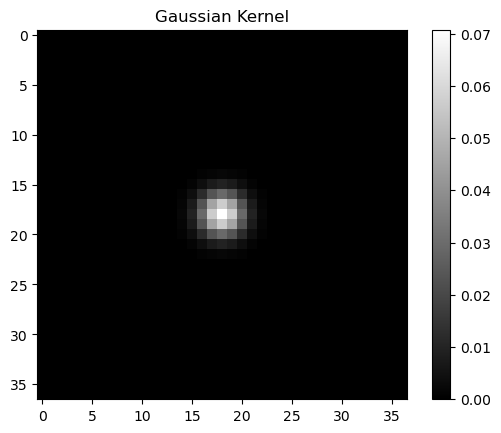

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
def guassian_kernel(sigma):
    size = 37
    if size % 2 == 0:
        size += 1
    centre = size // 2
    x, y = np.meshgrid(range(-centre, centre + 1), range(-centre, centre + 1))
    print(x, y)  # Correct indentation
    var = sigma ** 2
    g = (1 / (2 * np.pi * var)**0.5) * np.exp(-(x**2 + y**2) / (2 * var))
    g /= g.sum()
    return x,y,g

def sobel_filter():
    f = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return f

sigma1 = 1.5
sigma2 = 3 * sigma1
xx, yy, g1 = guassian_kernel(sigma1)
g1 = g1.astype(np.float32)   # Gaussian kernel
f = sobel_filter().astype(np.float32)           # Sobel filter
print(g1.shape)
print(f)
# Visualize the Gaussian kernel
plt.imshow(g1, cmap='gray')
plt.title("Gaussian Kernel")
plt.colorbar()
plt.show()


37 37
18 18
[[ 0.e+00  0.e+00  0.e+00 ...  0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00 ...  0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  3.e-45 ... -3.e-45  0.e+00  0.e+00]
 ...
 [ 0.e+00  0.e+00  3.e-45 ... -3.e-45  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00 ...  0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00 ...  0.e+00  0.e+00  0.e+00]]


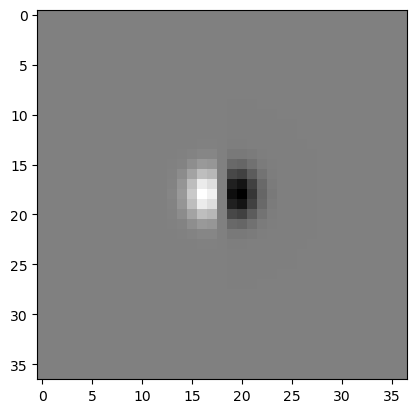

In [3]:
from math import cos,sin
g2=cv2.filter2D(g1,-1,f)
rows,cols=g2.shape
print(rows,cols)
centre=(rows//2,cols//2)
print(centre[0],centre[1])
new_mat=np.zeros_like(g2)

t=np.deg2rad(135)
for i in range (0,rows):
    for j in range (0,cols):
        x=i-centre[0]
        y=j-centre[1]
        new_x=x*cos(t)-y*sin(t)+centre[0]
        new_y=y*cos(t)+x*sin(t)+centre[1]
        if 0<new_x<rows and 0<new_y<cols:
            new_mat[int(new_x)][int(new_y)]=g2[i][j]
print(g2)
plt.imshow(g2,cmap='gray')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


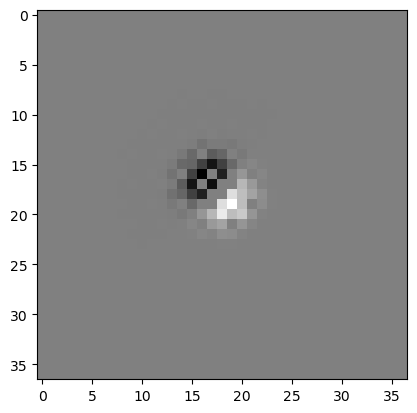

In [4]:
print(new_mat)
plt.imshow(new_mat,cmap='gray')

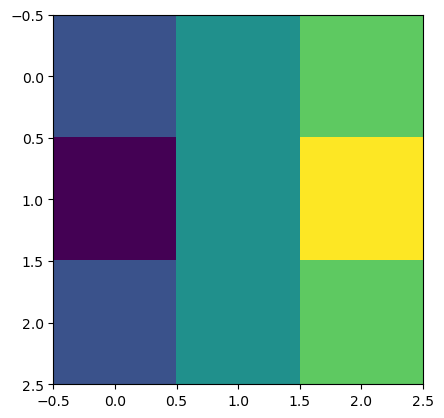

In [5]:
plt.imshow(f)

/tmp/ipykernel_257606/4089052310.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig1.gca(projection='3d')


NameError: name 'cm' is not defined

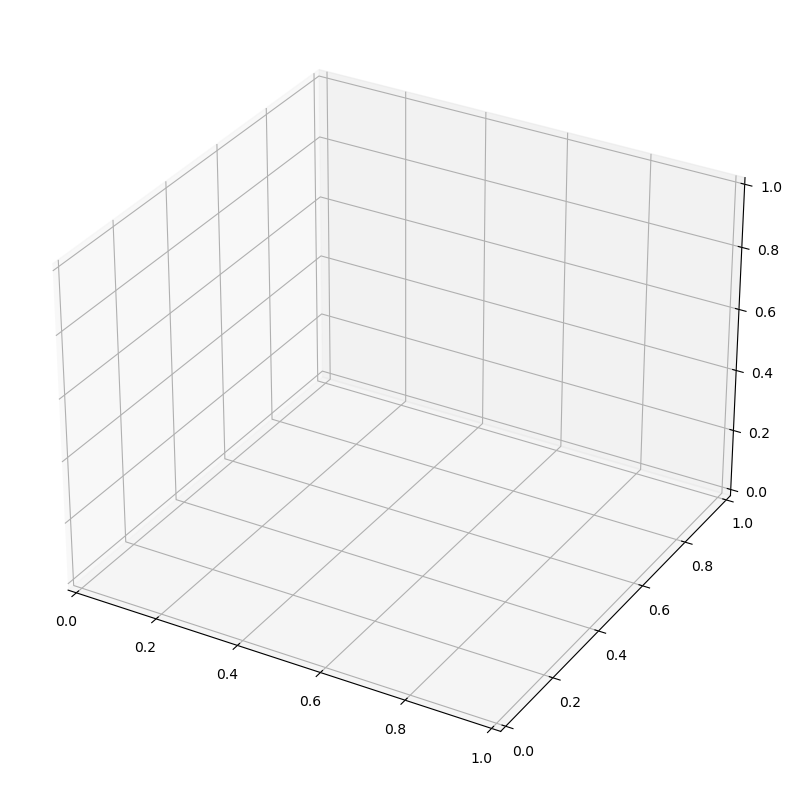

In [6]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.gca(projection='3d')
ax1.plot_surface(xx, yy, new_mat,rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
plt.xlabel("x")
plt.ylabel("y")
plt.title(notitle)
plt.show()


In [7]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.ndimage as ndi
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

In [8]:
def gauss2d(mu=[0,0], sigma=[1.5,1.5], order=[0,0]):
    """
    order =[0,0] plots the 2-dim Gauss function
    order =[0,1] plots the x-derivative of the 2-dim Gauss function
    order =[1,0] plots the y-derivative of the 2-dim Gauss function
    order =[0,2] plots the 2nd order x-derivative of the 2-dim Gauss function
    order =[2,0] plots the 2nd order y-derivative of the 2-dim Gauss function
    order =[2,2] plots the Laplacian of Gaussian
    """
    w, h = 100, 100

    std = [np.sqrt(sigma[0]), np.sqrt(sigma[1])]
    x = np.linspace(mu[0] - 3 * std[0], mu[0] + 3 * std[0], w)
    y = np.linspace(mu[1] - 3 * std[1], mu[1] + 3 * std[1], h)

    x, y = np.meshgrid(x, y)

    x_ = x.flatten()
    y_ = y.flatten()
    xy = np.vstack((x_, y_)).T

    normal_rv = multivariate_normal(mu, sigma)
    z = normal_rv.pdf(xy)
    z=z.reshape(w, h, order='F')
    title="2D-Gauss"
    if order == [1,0]:
        z = -x/sigma[0]**2*z.reshape(w, h, order='F')
        title="y-derivative of 2D-Gauss"
    elif order == [0,1]:
        z = -y/sigma[1]**2*z.reshape(w, h, order='F')
        title="x-derivative of 2D-Gauss"
    elif order == [0,2]:
        z = (y**2/sigma[1]**4-1/sigma[1]**2)*z.reshape(w, h, order='F')
        title="Second order x-derivative of 2D-Gauss"
    elif order == [2,0]:
        z = (x**2/sigma[1]**4-1/sigma[1]**2)*z.reshape(w, h, order='F')
        title="Second order y-derivative of 2D-Gauss"
    elif order == [2,2]:
        z = ((x**2+y**2)/sigma[1]**4-2/sigma[1]**2)*z.reshape(w, h, order='F')
        title="Second order y-derivative of 2D-Gauss" 

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z.T,rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()

    return z

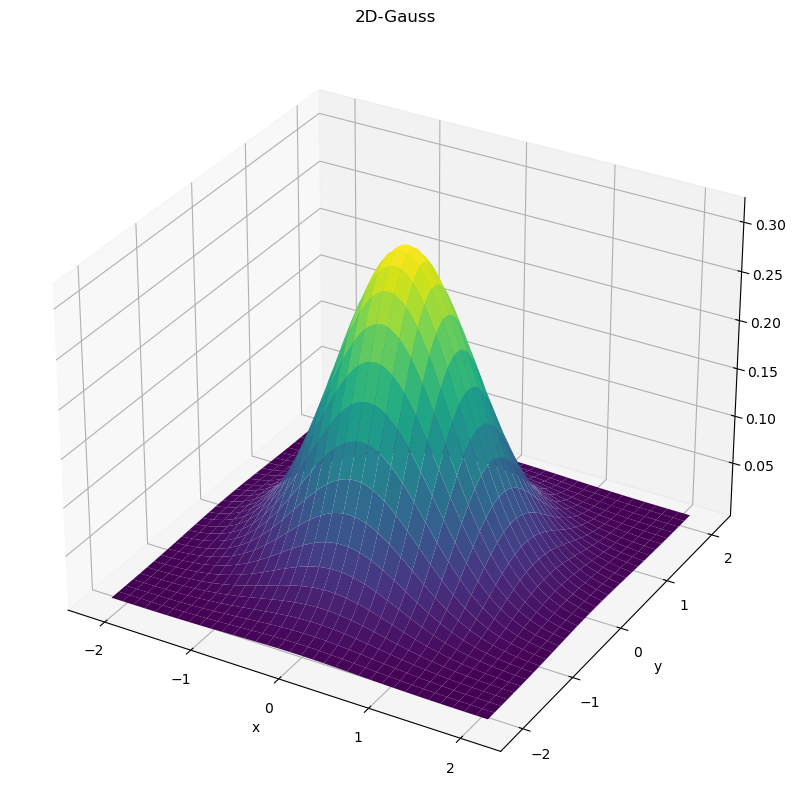

In [9]:
MU = [0,0]
SIGMA = [0.5,0.5]
z = gauss2d(MU, SIGMA, order=[0,0])

In [12]:
import sklearn
print(sklearn.__version__)


1.6.1


In [72]:
import numpy as np
import cv2
from math import cos,sin
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
def guassian_kernel(sigma,centre):
	'''
	size=int(np.ceil(7*sigma))
	if size%2==0:
		size+=1
	centre=size//2
	'''
	x,y=np.meshgrid(range(-centre,centre+1),range(-centre,centre+1))

	var=sigma**2
	g=(1/(2*np.pi*var)**0.5)*np.exp(-(x**2+y**2)/2*var)
	g/=g.sum()
	return g
    

def sobel_filter():
	f=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
	return f

def guass_der(sigma, order, arr):
    g = np.zeros_like(arr)
    var = sigma**2
    # Calculate Gaussian values vectorized
    g = (1 / ((2 * np.pi * var)**0.5)) * np.exp(-(arr**2) / (2 * var))
    # First derivative
    if order == 1:
        g = -(arr / var) * g
    # Second derivative
    elif order == 2:
        g = ((arr * arr - var) / var**2) * g
    return g

def guass_make(sigmax, sigmay, ordx, ordy, new_arr, size):
    centre = size // 2
    # x=np.arrange(-centre,centre+1,size)
    # y=np.arrange(-centre,centre+1,size)
    gx = guass_der(sigmax, ordx, new_arr[0])
    gy = guass_der(sigmay, ordy, new_arr[1])

    #print("gx shape:", gx.shape)
    #print("gy shape:", gy.shape)
    
    g = np.reshape(gx * gy, (31, 31),'C')
    #guass_normalize(g)
    
    return g

def guass_normalize(g):
	g=g-np.mean(g)
	g/=np.sum(np.abs(g))
	return g

def guass_laplacian(sigma,arr,size):
	g = np.zeros_like(arr)
	var=sigma**2
	g = (1 / ((2 * np.pi * var)**0.5)) * np.exp(-(arr[0]**2+arr[1]**2) / (2 * var))
	gl=(((arr[0]**2+arr[1]**2)/var**2)-(2/var))*g
	gl=np.reshape(gl,(size,size),'C')
	#guass_normalize(gl)
	return gl

def save_filters_as_image(filters, filename, rows, cols):
   
    code_dir = os.getcwd()
    
    # Construct the path for the new_images folder
    save_dir = os.path.join(code_dir, "new_images")
    os.makedirs(save_dir, exist_ok=True)  # Create the folder if it doesn't exist

    # Full path to save the image file
    full_path = os.path.join(save_dir, filename)
    
    # Create the plot with the filters
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5))
    fig.suptitle(filename, fontsize=16)

    count = 0
    for i in range(rows):
        for j in range(cols):
            if count < filters.shape[2]:
                axes[i, j].imshow(filters[:, :, count], cmap='gray')
                axes[i, j].axis('off')
                count += 1
            else:
                axes[i, j].axis('off')  # Turn off empty subplots
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust for title

    # Save the plot as an image file
    plt.savefig(full_path, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)  # Close the plot to free up memory

    # Read the saved image using OpenCV and re-save it (optional, as required)
    image = cv2.imread(full_path)
    cv2.imwrite(full_path, image)  # Save the image using OpenCV

    print(f"Image saved to: {full_path}")


def guass_cv2_norm(F):
    rows, cols, num_filters = F.shape
    for i in range(num_filters):
        F[:, :, i] = F[:, :, i] / np.sum(np.abs(F[:, :, i]))
        
        # Scale to the range [0, 255]
        #F[:, :, i] *= 255
    
    return F
def guass_cv2_255norm(F):
    rows, cols, num_filters = F.shape
    for i in range(num_filters):
        # Normalize each filter to the range [0, 1]
        min_v= F[:, :, i].min()
        max_v = F[:, :, i].max()
        if max_v- min_v > 0:  # Avoid division by zero
            F[:, :, i] = (F[:, :, i] - min_v) / (max_v - min_v)
        
        # Scale to the range [0, 255]
        F[:, :, i] *= 255
    
    return F.astype(uint8)
def plot_filters(filters, title, rows=4, cols=12, filename='LM.png'):
    """
    Plot all the filters in a grid layout (4 rows x 12 columns).
    """
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    fig.suptitle(title, fontsize=16)
    
    count = 0
    for i in range(rows):
        for j in range(cols):
            if count < filters.shape[2]:
                axes[i, j].imshow(filters[:, :, count], cmap='gray')
                axes[i, j].axis('off')
                count += 1
            else:
                axes[i, j].axis('off')  # Turn off empty subplots
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust for title
    plt.savefig(filename)  # Save the image
    plt.show() 

def gabor(sigma, theta, Lambda, psi, gamma, filter_size):
    """Generate a Gabor filter of fixed size (31x31)."""
    sigma_x = sigma
    sigma_y = float(sigma) / gamma
    
    # Fixed filter size (bounding box is determined by this size)
    #nstds = 3  # Number of standard deviations
    xmax = filter_size // 2  # Half the filter size
    ymax = filter_size // 2  # Half the filter size
    xmin = -xmax
    ymin = -ymax

    # Create meshgrid for the filter
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    # Gabor filter equation
    gb = np.exp(
        -0.5 * (x_theta**2 / sigma_x**2 + y_theta**2 / sigma_y**2)
    ) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    
    return gb

def create_gabor_filter_bank(scales, orientations, Lambda, psi, gamma, filter_size):
    """Create a Gabor filter bank with specified scales and orientations, fixed size filters."""
    num_filters = len(scales) * orientations  # 32 filters in total (4 scales * 8 orientations)
    
    # Initialize the filter bank with zeros (filter_size x filter_size x num_filters)
    filter_bank = np.zeros((filter_size, filter_size, num_filters))

    # Create filters for each scale and orientation
    filter_idx = 0
    for scale in scales:
        for orientation in range(orientations):
            theta = 2*np.pi * orientation / orientations  # Convert orientation to radians
            # Generate Gabor filter and place it in the filter bank
            filter_bank[:, :, filter_idx] = gabor(scale, theta, Lambda, psi, gamma, filter_size)
            filter_idx += 1
    
    return filter_bank

################################clustering and finals ###############
def filter_operation(image_path, F1,F2,F3,F4):
    # Load image and convert to grayscale
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image could not be loaded. Check the file path.")
    
    # Convert to grayscale (note: this removes the need to deal with color channels)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   
    # Convert image to float for processing (normalize to range [0, 1])
    #image = image.astype(np.float32) / 255.0
    #for i in range(F1.shape[2]):
        #F1[:, :, i] = F1[:, :, i] / np.sum(np.abs(F1[:, :, i]))
    
    
    # Initialize image bank to store filter responses
    H, W = image.shape
    total_filters = F1.shape[2] + F2.shape[2]+ F4.shape[2]+ F3.shape[2]#  # Number of filters from both F1 and F2
    image_bank = np.zeros((H, W, total_filters), dtype=np.float32)

    # Apply filters from F1 filter bank
    count = 0
    for i in range(F1.shape[2]):  # Iterate over filters in F1
        image_bank[:, :, count] = cv2.filter2D(image, -1, F1[:, :, i])
        count += 1
        
    
    # Apply filters from F2 filter bank
    for i in range(F2.shape[2]):  # Iterate over filters in F2
        image_bank[:, :, count] = cv2.filter2D(image, -1, F2[:, :, i])
        count += 1
    
    for i in range(F3.shape[2]):  # Iterate over filters in F1
        image_bank[:, :, count] = cv2.filter2D(image, -1, F3[:, :, i])
        count += 1
    
    # Apply filters from F2 filter bank
    
    for i in range(F4.shape[2]):  # Iterate over filters in F2
        image_bank[:, :, count] = cv2.filter2D(image, -1, F4[:, :, i])
        count += 1
    '''
    # Normalize the image bank to the range [0, 255]
    print("Filter Values before normo:")
    print(image_bank[:, :, 0])
    '''
    image_bank = np.clip(image_bank * 255.0, 0, 255).astype(np.uint8)
    
    '''
    plt.figure(figsize=(6, 6))
    plt.title("Grayscale Image")
    plt.imshow(image_bank[:,:,33], cmap='gray')
    plt.axis('off')
    plt.show()
    '''
    return image_bank

def apply_texton_map(image_bank, n_clusters, output_path,filename):
    H, W, N = image_bank.shape

    # Reshape the image bank to a 2D array of shape (H*W, N)
    reshaped_image_bank = image_bank.reshape(-1, N)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reshaped_image_bank)

    # Get the cluster labels for each pixel
    texton_map = kmeans.labels_.reshape(H, W)

    # Ensure output directory exists
    os.makedirs(output_path, exist_ok=True)

    # Full path to save the image file
    full_path = os.path.join(output_path, filename)

    # Create a colormap for visualization
    colormap = plt.get_cmap('viridis')  # You can choose any colormap you like
    texton_colored_map = colormap(texton_map / n_clusters)  # Normalize for colormap
    '''
    plt.figure(figsize=(8, 8))
    plt.title("Texton Map (T)")
    plt.imshow(texton_colored_map)
    plt.axis('off')
    plt.show()
    '''
    # Convert colormap output (RGBA) to an OpenCV-compatible format (BGR)
    texton_colored_map_rgb = (texton_colored_map[:, :, :3] * 255).astype(np.uint8)  # Discard alpha channel and scale
    texton_colored_map_bgr = cv2.cvtColor(texton_colored_map_rgb, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR

    # Save the image using OpenCV
    cv2.imwrite(full_path, texton_colored_map_bgr)

    return texton_map



def apply_bright_cluster(image_path , n_clusters,output_path,filename):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image could not be loaded. Check the file path.")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    gray_image = gray_image.astype(np.float32) / 255.0

    H, W = gray_image.shape
    reshaped_gray_image = gray_image.reshape(-1, 1)

    # Apply KMeans clustering on brightness values
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reshaped_gray_image)
    
    os.makedirs(output_path, exist_ok=True)

    # Full path to save the image file
    full_path = os.path.join(output_path, filename)
    # Get the cluster labels for each pixel
    brightness_map = kmeans.labels_.reshape(H, W)

    colormap = plt.get_cmap('viridis')  
    brightness_colored_map = colormap(brightness_map / n_clusters)  # Normalize for colormap

    # Display the brightness map and optionally save it
    '''
    plt.figure(figsize=(8, 8))
    plt.title("Brightness Map (B)")
    plt.imshow(brightness_colored_map)
    plt.axis('off')
    plt.show()
    '''
    brightness_colored_map_rgb = (brightness_colored_map[:, :, :3] * 255).astype(np.uint8)  # Discard alpha channel and scale
    brightness_colored_map_bgr = cv2.cvtColor(brightness_colored_map_rgb, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR

    # Save the image using OpenCV
    cv2.imwrite(full_path, brightness_colored_map_bgr)

    return brightness_map

def apply_color_cluster(image_path, n_clusters, output_path, filename):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image could not be loaded. Check the file path.")
    
    # Convert image to RGB (OpenCV uses BGR by default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    H, W, D = image.shape
    
    # Reshape the image for clustering (H * W, D), treating all color channels together
    reshaped_image = image.reshape(-1, D)
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reshaped_image)
    
    # Reshape the clustered labels back to the original image shape
    new_shape = kmeans.labels_.reshape(H, W)
    
    # Map cluster labels to colors using a colormap
    colormap = plt.cm.get_cmap('viridis', n_clusters)  # Use a colormap like 'viridis'
    color_image = colormap(new_shape)  # Apply the colormap to the cluster labels
    
    # Convert the colormap result to RGB
    c_channel = (color_image[:, :, :3] * 255).astype(np.uint8)  # Normalize the colors to [0, 255]

    # Display the clustered color image
    '''
    plt.figure(figsize=(10, 10))
    plt.title("Clustered Color Image")
    plt.imshow(c_channel)
    plt.axis('off')
    plt.show()
    '''
    # Save the processed image
    os.makedirs(output_path, exist_ok=True)

    # Full path to save the image file
    full_path = os.path.join(output_path, filename)
    
    # Save the processed image
    cv2.imwrite(full_path, cv2.cvtColor(c_channel, cv2.COLOR_RGB2BGR))  # Convert back to BGR for saving in OpenCV
    
    return c_channel



def generate_mask_disks(radii):
    # Initialize variables
    masks = []
    rad_scales = [1, 1.5, 2]  # Radii for scales
    norient = 8  # Number of orientations

    for r in rad_scales:
        # Calculate mask size and center
        mask_size = int(r * radii * 2 + 1)
        centre = mask_size // 2

        # Create meshgrid for coordinates
        x, y = np.meshgrid(np.arange(-centre, centre + 1), np.arange(-centre, centre + 1))

        # Create circular disk mask
        disk_mask = (x**2 + y**2 <= (r * radii)**2).astype(np.float32)

        # Create upper and lower masks
        upper_mask = (y > 0).astype(np.float32)
        lower_mask = (y <= 0).astype(np.float32)

        # Generate initial upper and lower half-discs
        masks.append(disk_mask * upper_mask)
        masks.append(disk_mask * lower_mask)

        # Generate rotated versions for each orientation
        for orient in range(1, norient):
            angle = 360 * orient / norient  # Compute rotation angle
            rotation_matrix = cv2.getRotationMatrix2D((centre, centre), angle, 1)

            # Rotate upper and lower half-discs
            rotated_upper = cv2.warpAffine(masks[-2], rotation_matrix, (mask_size, mask_size))
            rotated_lower = cv2.warpAffine(masks[-1], rotation_matrix, (mask_size, mask_size))

            # Add to the list of masks
            masks.append(rotated_upper)
            masks.append(rotated_lower)

    # Visualize masks
    rows, cols = 6, 8  # Adjust grid size for visualization
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

    count_fig = 0
    for i in range(rows):
        for j in range(cols):
            if count_fig < len(masks):
                axes[i, j].imshow(masks[count_fig], cmap='gray')
                axes[i, j].axis('off')
                count_fig += 1
            else:
                axes[i, j].axis('off')  # Turn off empty subplots

    plt.tight_layout()
    plt.show()

    return masks

def calc_chi(image, masks,output_path,filename, epsilon=1e-10):
    
    # Initialize gradient array
    if len(image.shape) < 3:  # Grayscale image
        t_chi = np.zeros_like(image, dtype=np.float32)
        
        # Ensure masks are in pairs
        if len(masks) % 2 != 0:
            raise ValueError("Masks should be in pairs (left and right).")
        
        for i in range(0, len(masks), 2):  # Iterate through mask pairs
            # Convolve the image with the left and right masks
            gi = cv2.filter2D(image, -1, masks[i])
            hi = cv2.filter2D(image, -1, masks[i + 1])
            
            # Update chi-squared distance
            t_chi += 0.5 * ((gi - hi) ** 2) / (gi + hi + epsilon)
    else:  # Color image
        t_chi = np.zeros_like(image[:,:,0], dtype=np.float32)  # Start with a single channel

        # Iterate through color channels (R, G, B)
        for depth in range(3):
            for i in range(0, len(masks), 2):  # Iterate through mask pairs
                # Convolve the image with the left and right masks
                
                gi = cv2.filter2D(image[:,:,depth], -1, masks[i])
                hi = cv2.filter2D(image[:,:,depth], -1, masks[i + 1])
                #if depth==0:
                    #print(image[:,:,depth])
                    #print(gi)
                    #print(hi)
                
                
                # Update chi-squared distance for the current channel
                t_chi += 0.5 * ((gi - hi) ** 2) / (gi + hi + epsilon)
                
    t_chi_min = np.min(t_chi)
    t_chi_max = np.max(t_chi)
    
    # Avoid division by zero if the min and max are the same
    if t_chi_max - t_chi_min > 0:
        t_chi = (t_chi - t_chi_min) / (t_chi_max - t_chi_min)
    else:
        t_chi = np.zeros_like(t_chi)

    # Convert the normalized result to uint8 (scaled to [0, 255])
    t_chi_f = (t_chi * 255).astype(np.uint8)
    ###visualization#####
    os.makedirs(output_path, exist_ok=True)

    # Full path to save the image file
    full_path = os.path.join(output_path, filename)

    # Create a colormap for visualization
    colormap = plt.get_cmap('viridis')  # You can choose any colormap you like
    t_colored_map = colormap(t_chi_f /255)  # Normalize for colormap
    '''
    plt.figure(figsize=(8, 8))
    plt.title(" gradient ")
    plt.imshow(t_colored_map)
    plt.axis('off')
    plt.show()
    '''
    # Convert colormap output (RGBA) to an OpenCV-compatible format (BGR)
    t_colored_map_rgb = (t_colored_map[:, :, :3] * 255).astype(np.uint8)  # Discard alpha channel and scale
    t_colored_map_bgr = cv2.cvtColor(t_colored_map_rgb, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR

    # Save the image using OpenCV
    cv2.imwrite(full_path, t_colored_map_bgr)
    
    return t_chi_f
    
def compute_pb_edges(tg, bg, cg, cannypb, sobelpb,output_path,filename, w1=0.5, w2=0.5):
   
    # Step 1: Normalize tg, bg, cg to [0, 1] range
    tg = tg / 255.0
    bg = bg / 255.0
    cg = cg / 255.0
    
    # Initialize PbEdges with zeros, having the same shape as tg (float32 type)
    PbEdges = np.zeros_like(tg, dtype=np.float32)
    
    mean_feature_strength = (tg + bg + cg) / 3
    

    cannypb = cannypb / 255.0
    sobelpb = sobelpb / 255.0
    
    #  Combine the Canny and Sobel outputs with weights
    combined_baseline = w1 * cannypb + w2 * sobelpb

    # Hame...product
    PbEdges = mean_feature_strength * combined_baseline

    #normalize
    PbEdges = PbEdges / PbEdges.max()

    
    plt.imshow(PbEdges, cmap='gray')
    plt.title("Pb-lite Output")
    plt.axis('off')  # Hide axis
    plt.show()
    os.makedirs(output_path,exist_ok=True)
    full_path=os.path.join(output_path,filename)
    # Save the result if needed
    cv2.imwrite(full_path, (PbEdges * 255).astype(np.uint8))

    return PbEdges

In [73]:
F1=np.zeros((31,31,32))
dog_scales=[1,2]
dog_orient=16
sizedog=31
centre1=sizedog//2
count=0
for dog_sigma in range (0,len(dog_scales)):
        g1=guassian_kernel(dog_scales[dog_sigma],centre1).astype(np.float32)
        f=sobel_filter().astype(np.float32)
        F1[:,:,count]=cv2.filter2D(g1,-1,f)
        g2=F1[:,:,count]
        count+=1
        rows,cols=g2.shape
        centre=(rows//2,cols//2)
        new_mat = np.zeros_like(g2)
        for dog_rot in range(1, dog_orient):
            t =   2*np.pi * dog_rot/dog_orient
            for i in range(0, rows):
                for j in range(0, cols):
                    x = i - centre[0]
                    y = j - centre[1]
                    new_x = x * cos(t) - y * sin(t) + centre[0]
                    new_y = y * cos(t) + x * sin(t) + centre[1]
                    if 0 <= new_x < rows and 0 <= new_y < cols:
                        new_mat[int(new_x)][int(new_y)] = g2[i][j]
            F1[:, :, count] = new_mat
            count += 1
            new_mat = np.zeros_like(g2)
F1 = guass_cv2_norm(F1)

save_filters_as_image(F1, filename='DoG.png',rows=2,cols=16)
    

Image saved to: /home/harmeet/cv25/hsdhillon_hw0/Phase1/Code/new_images/DoG.png


[[-15 -14 -13 ...  13  14  15]
 [-15 -15 -15 ...  15  15  15]]


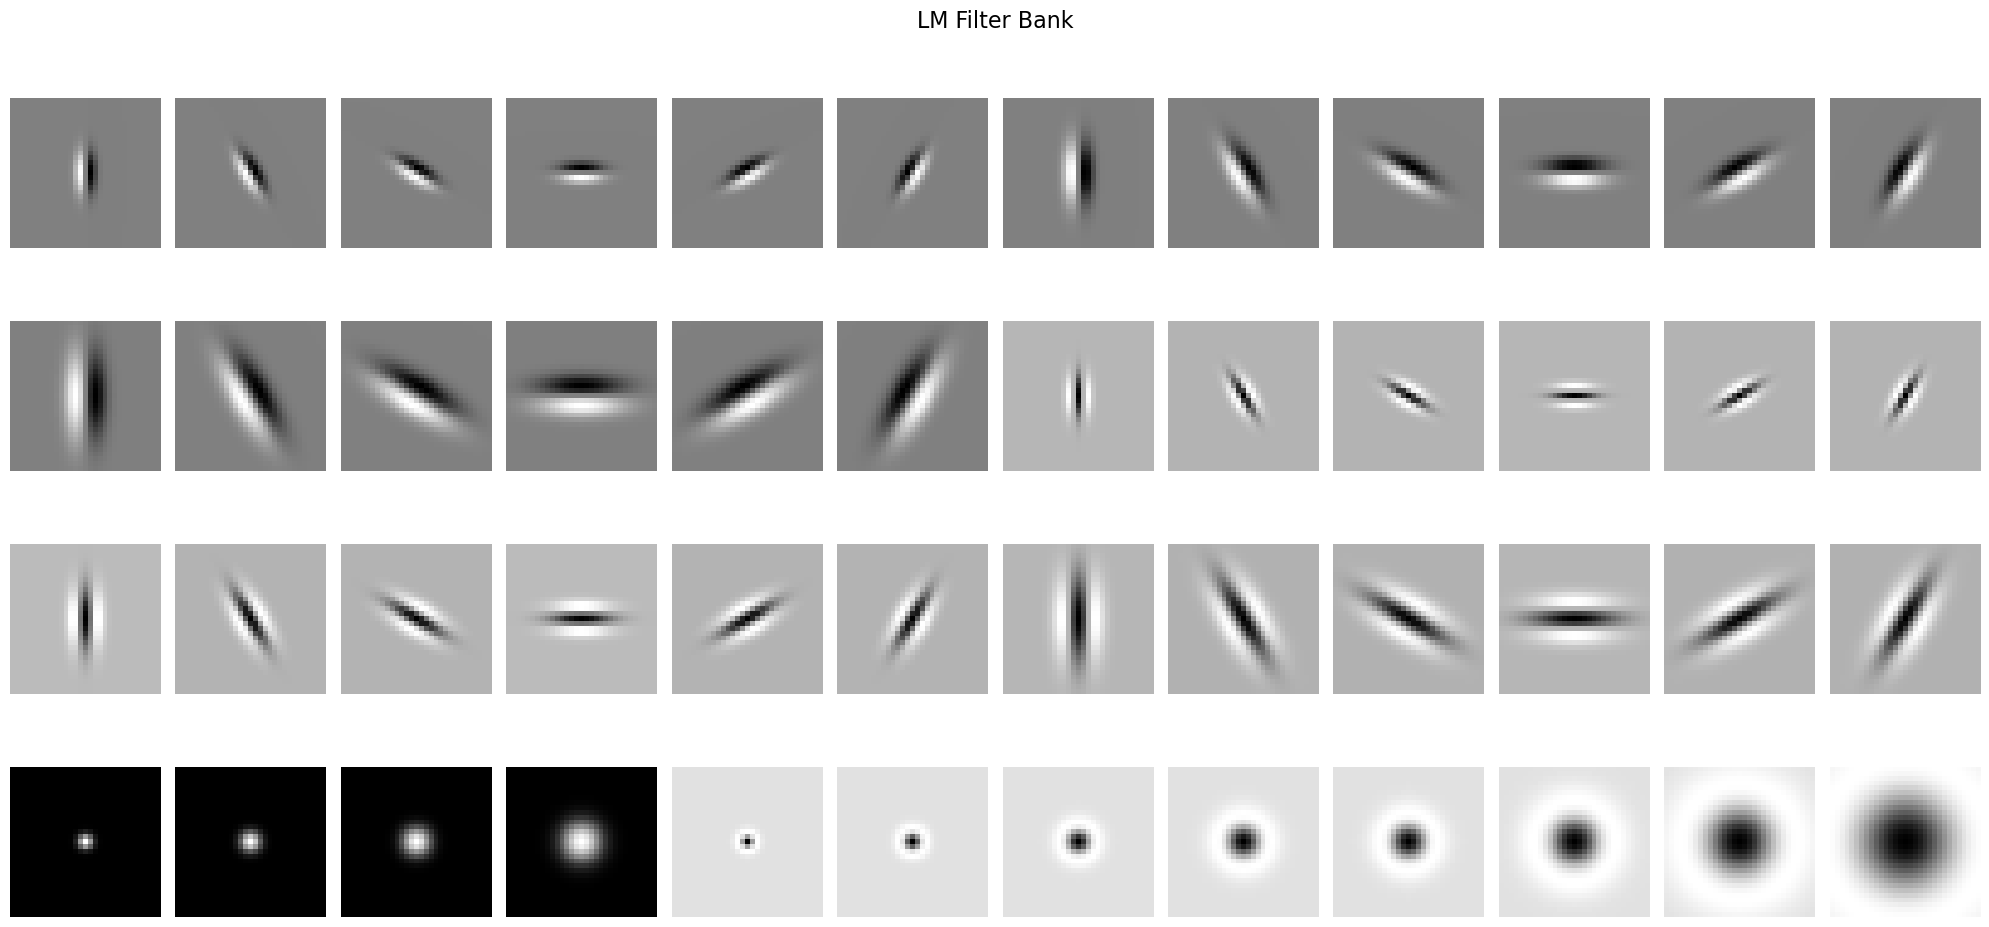

Image saved to: /home/harmeet/cv25/hsdhillon_hw0/Phase1/Code/new_images/LM.png


In [74]:
F2 = np.zeros((31, 31, 48))  
orient = 6
scales = [1, np.sqrt(2), 2]
first_der_count = len(scales) * orient
sec_der_count = len(scales) * orient

sizelm = 31
centre = sizelm // 2
x, y = np.meshgrid(np.arange(-centre, centre + 1), np.arange(-centre, centre + 1))
x_ = x.flatten()
y_ = y.flatten()
#print(x_)
#print(y_)
xy = np.stack((x_, y_), axis=-1).T
print(xy)

count = 0
for sc in range(len(scales)):
    for oc in range(orient):
        angle = np.pi * oc / orient
        c = np.cos(angle)
        s = np.sin(angle)
        rot_mat = np.array([[c, -s], [s, c]])
        new_arr = np.dot(rot_mat, xy)
        # Check bounds before assignment
        if count < F2.shape[2]:
            F2[:, :, count] = guass_make(scales[sc], 3 * scales[sc], 1, 0, new_arr, sizelm)
        

        # Check bounds before second assignment
        if count + first_der_count < F2.shape[2]:
            F2[:, :, count + first_der_count] = guass_make(scales[sc], 3 * scales[sc], 2, 0, new_arr, sizelm)
        count += 1

# After first and second derivatives
count = first_der_count + sec_der_count

# Handle non-rotating scales
nonrot_scales = [1, np.sqrt(2), 2, (2 * np.sqrt(2))]
for rsc in range(len(nonrot_scales)):
    # Ensure the indices are within bounds before assignment
    if count < F2.shape[2]:
        F2[:, :, count] = guass_make(nonrot_scales[rsc], nonrot_scales[rsc], 0, 0, xy, sizelm)
    if count + 4 < F2.shape[2]:
        F2[:, :, count + 4] = guass_laplacian(nonrot_scales[rsc], xy, sizelm)
    if count + 8 < F2.shape[2]:
        F2[:, :, count + 8] = guass_laplacian(3 * nonrot_scales[rsc], xy, sizelm)

    count +=1
F2 = guass_cv2_norm(F2)
plot_filters(F2, title="LM Filter Bank", rows=4, cols=12, filename='LM.png')
save_filters_as_image(F2, filename='LM.png',rows=4,cols=12)


[[-15 -14 -13 ...  13  14  15]
 [-15 -15 -15 ...  15  15  15]]


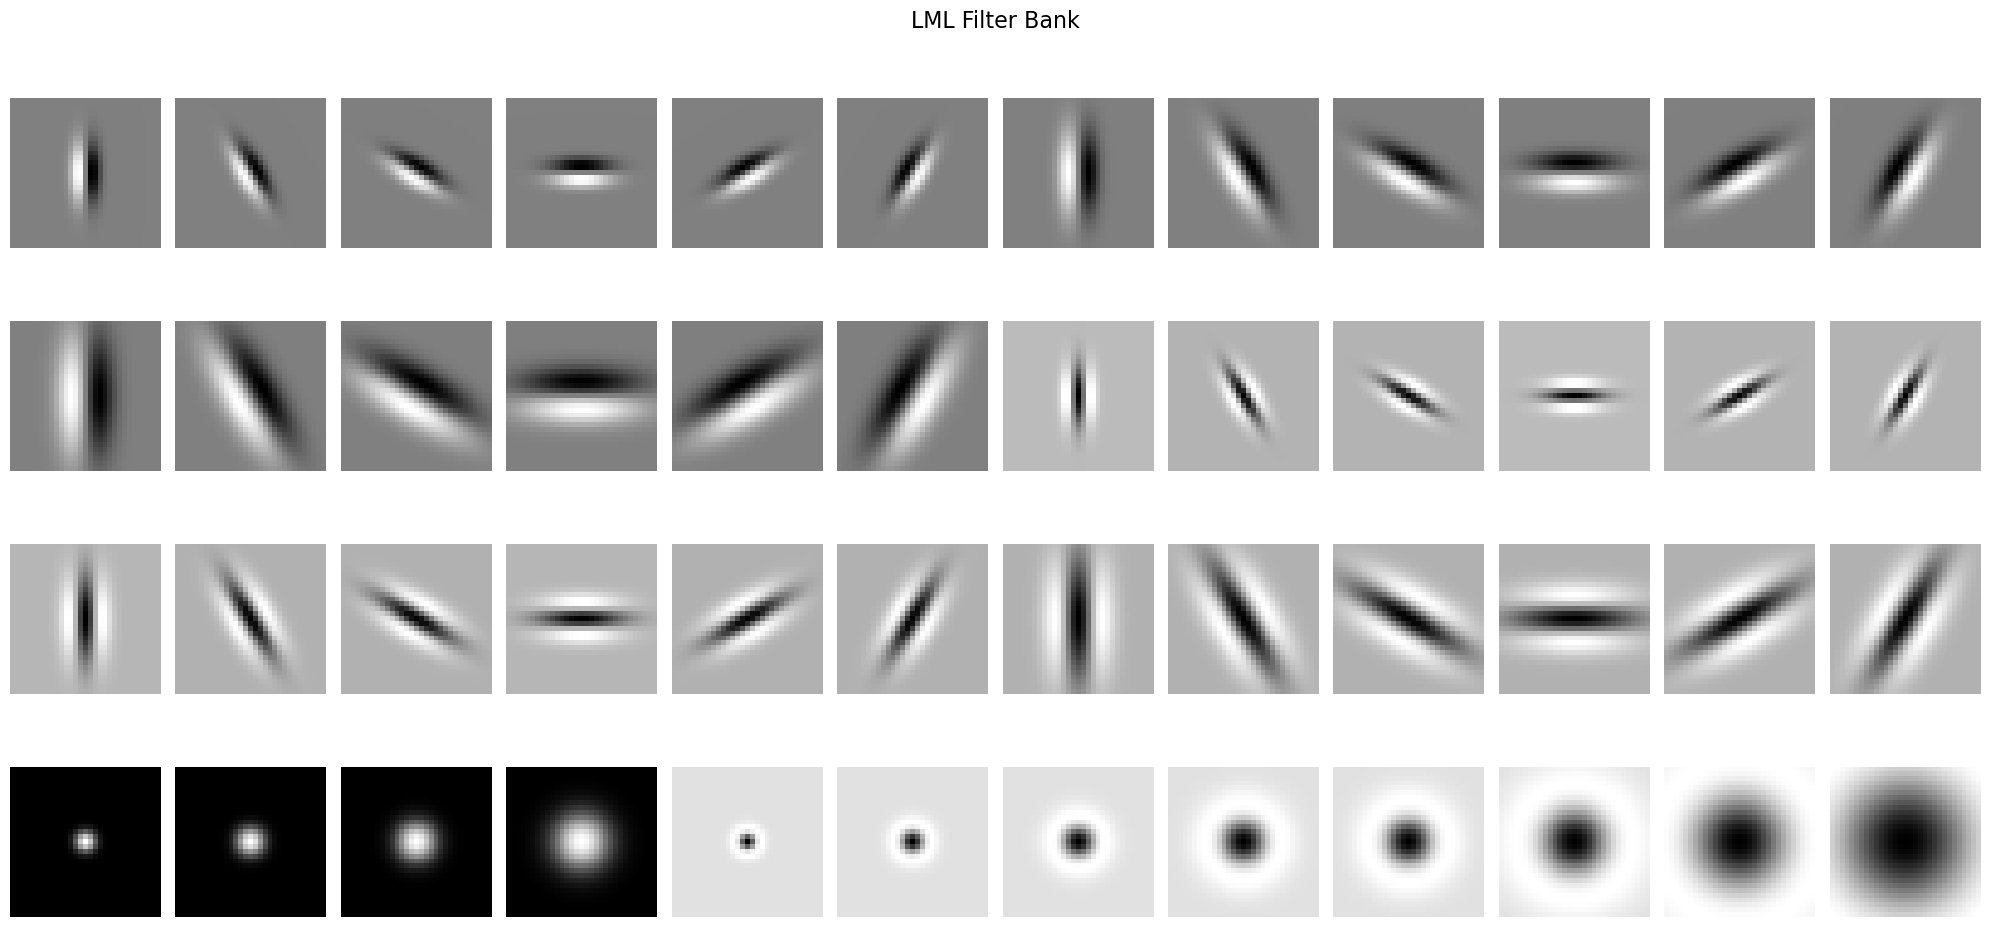

Image saved to: /home/harmeet/cv25/hsdhillon_hw0/Phase1/Code/new_images/LML.png


In [75]:
F3 = np.zeros((31, 31, 48))  
orient = 6
scales = [ np.sqrt(2), 2,2*np.sqrt(2)]
first_der_count = len(scales) * orient
sec_der_count = len(scales) * orient

sizelm =31
centre = sizelm // 2
xF3, yF3 = np.meshgrid(np.arange(-centre, centre + 1), np.arange(-centre, centre + 1))
x_F3= xF3.flatten()
y_F3 = yF3.flatten()
#print(x_)
#print(y_)
xy_F3 = np.stack((x_F3, y_F3), axis=-1).T
print(xy_F3)

count = 0
for sc in range(len(scales)):
    for oc in range(orient):
        angle = np.pi * oc / orient
        c = np.cos(angle)
        s = np.sin(angle)
        rot_mat = np.array([[c, -s], [s, c]])
        new_arr = np.dot(rot_mat, xy_F3)
        # Check bounds before assignment
        if count < F3.shape[2]:
            F3[:, :, count] = guass_make(scales[sc], 3 * scales[sc], 1, 0, new_arr, sizelm)
        

        # Check bounds before second assignment
        if count + first_der_count < F3.shape[2]:
            F3[:, :, count + first_der_count] = guass_make(scales[sc], 3 * scales[sc], 2, 0, new_arr, sizelm)
        count += 1

# After first and second derivatives
count = first_der_count + sec_der_count

# Handle non-rotating scales
nonrot_scales = [np.sqrt(2), 2,2*np.sqrt(2),4]
for rsc in range(len(nonrot_scales)):
    # Ensure the indices are within bounds before assignment
    if count < F3.shape[2]:
        F3[:, :, count] = guass_make(nonrot_scales[rsc], nonrot_scales[rsc], 0, 0, xy_F3, sizelm)
    if count + 4 < F3.shape[2]:
        F3[:, :, count + 4] = guass_laplacian(nonrot_scales[rsc], xy_F3, sizelm)
    if count + 8 < F3.shape[2]:
        F3[:, :, count + 8] = guass_laplacian(3 * nonrot_scales[rsc], xy_F3, sizelm)

    count += 1
    
F3 = guass_cv2_norm(F3)  #got the value between 0 to 255 --filter  banks 2
# Now plot and save the filter bank
plot_filters(F3, title="LML Filter Bank", rows=4, cols=12, filename='LML.png')
save_filters_as_image(F3, filename='LML.png',rows=4,cols=12)


In [76]:

scales_gabor = [ 2, 2 * np.sqrt(2),4,4*np.sqrt(2)]
orientations = 12 
Lambda = 10  # Example wavelength parameter
psi = 0  # Example phase shift
gamma = 0.5  # Example aspect ratio

# Create the Gabor filter bank
F4= create_gabor_filter_bank(scales_gabor, orientations, Lambda, psi, gamma, filter_size=31)
F4 = guass_cv2_norm(F4)
save_filters_as_image(F4, filename='Gabor.png',rows=4,cols=12)

Image saved to: /home/harmeet/cv25/hsdhillon_hw0/Phase1/Code/new_images/Gabor.png


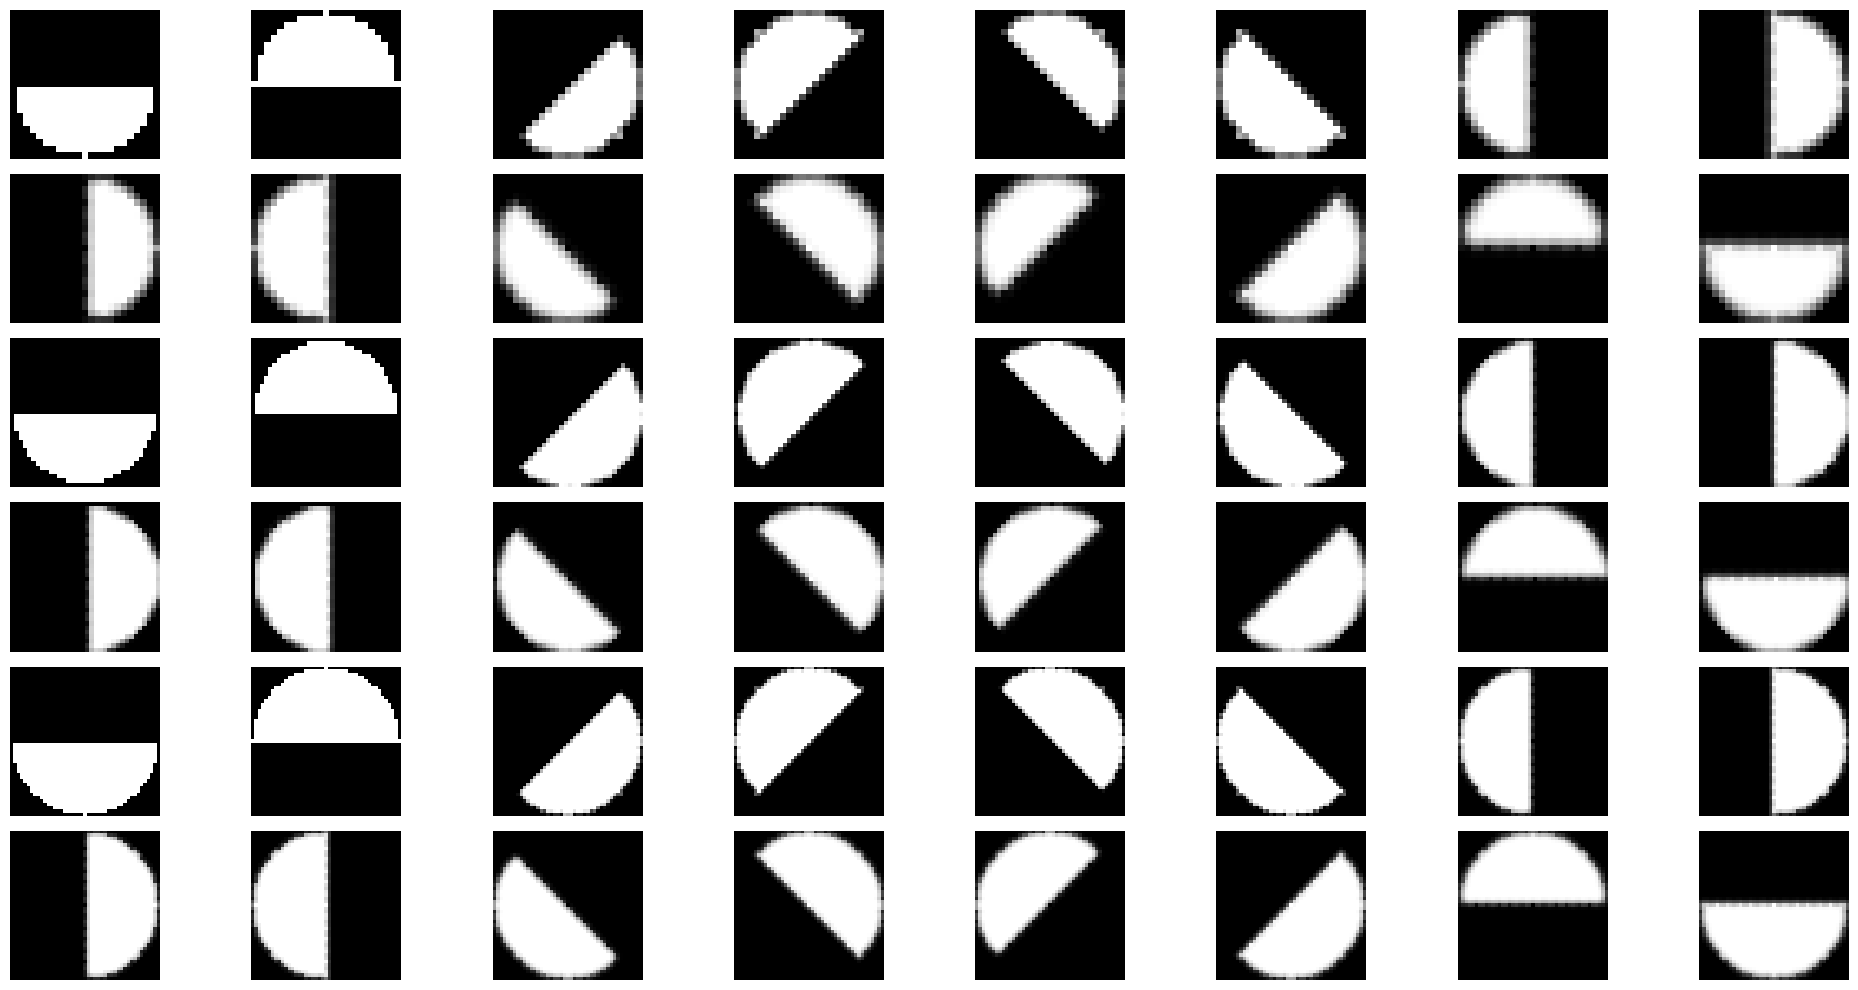

In [70]:
my_disks=generate_mask_disks(11)

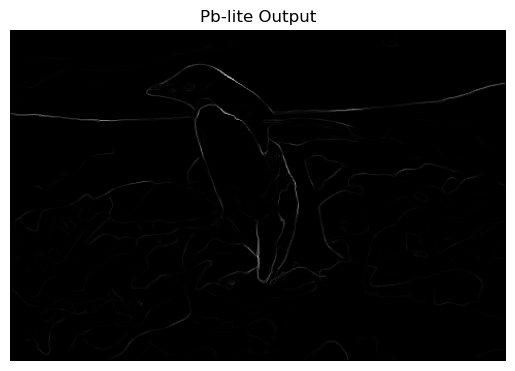

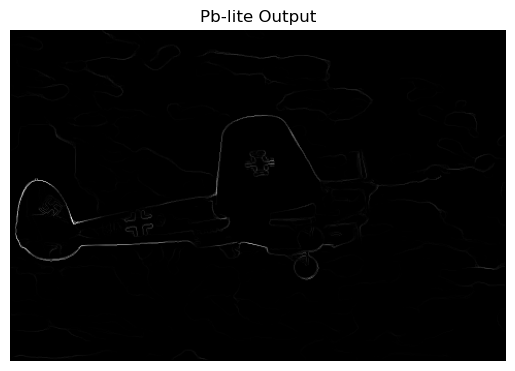

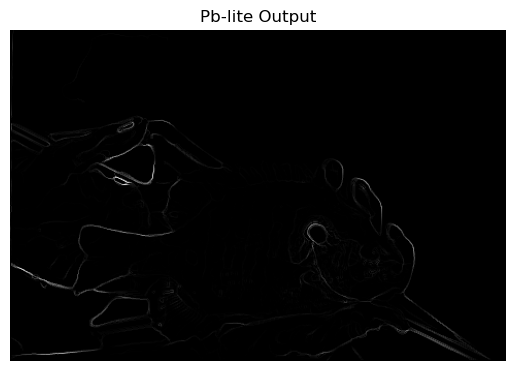

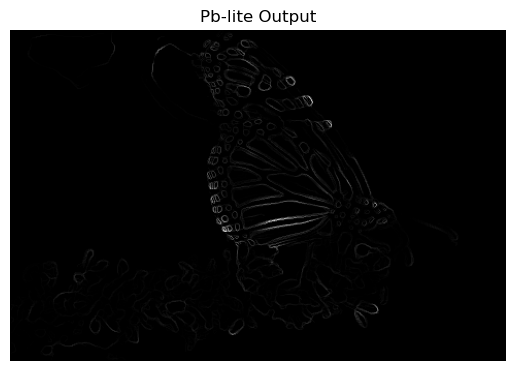

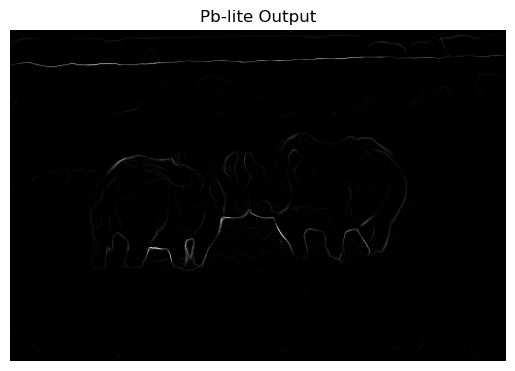

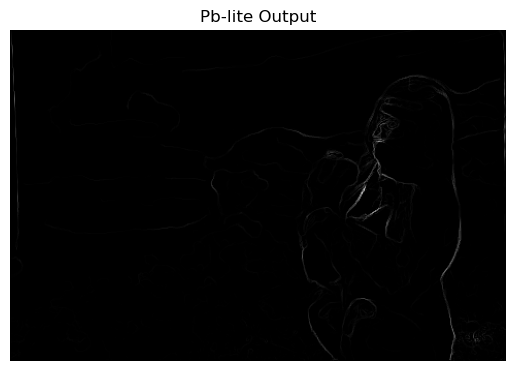

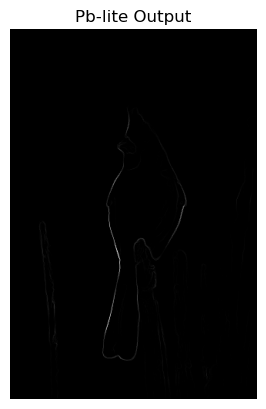

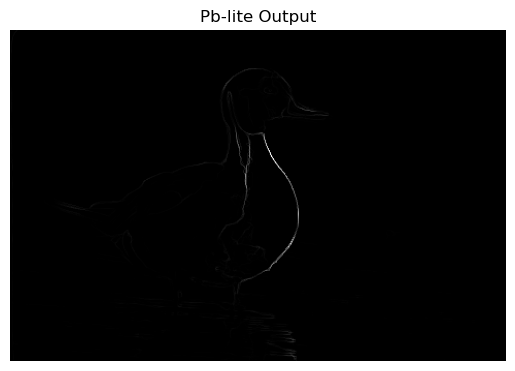

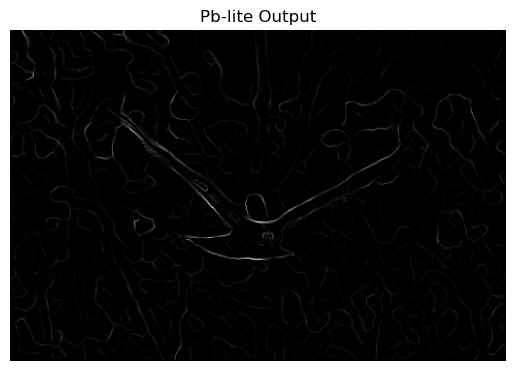

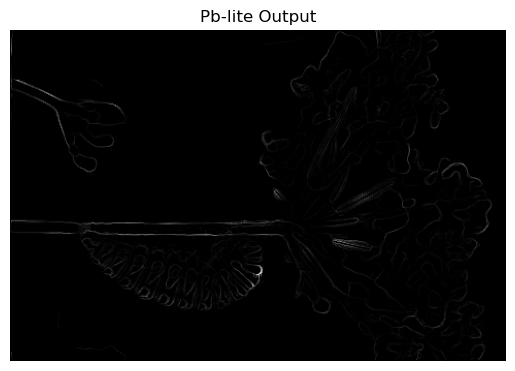

In [77]:
images_folder = "../BSDS500/Images"
canny_folder = "../BSDS500/CannyBaseline"
sobel_folder = "../BSDS500/SobelBaseline"
# Get a list of all image files in the directory (assuming they are in .jpg format)
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg','.png'))]

# Folder to save the output maps
output_folder = "./maps"
os.makedirs(output_folder, exist_ok=True)

output_folder1 = "./gradients"
os.makedirs(output_folder1, exist_ok=True)
output_folder2 = "./finals"
os.makedirs(output_folder2, exist_ok=True)
# Loop through each image in the folder
for image_filename in image_files:
    image_path = os.path.join(images_folder, image_filename)
    
    # Call your filter operation function
    image_bank = filter_operation(image_path, F1, F2, F3, F4)
    
    # Use apply_texton_map to process the image and save the output
    clustered_image = apply_texton_map(image_bank, 64, output_folder, image_filename)
    
    # Calculate chi-squared and save gradient image
    tg = calc_chi(clustered_image, my_disks, output_folder1, image_filename)
    
    # Create the filename for the brightened image
    bright_filename = 'bright' + image_filename
    
    # Apply brightness operation and save to output folder
    new_image = apply_bright_cluster(image_path, 16, output_folder, bright_filename)
    
    # Calculate chi-squared for the brightened image and save gradient image
    bg = calc_chi(new_image, my_disks, output_folder1, bright_filename)
    color_filename='color'+ image_filename
    new_mage2=apply_color_cluster(image_path,16,output_folder,color_filename)
    cg=calc_chi(new_mage2, my_disks, output_folder1, color_filename)
    canny_filename = image_filename.replace('.jpg', '.png')
    canny_path = os.path.join(canny_folder, canny_filename)
    cannypb = cv2.imread(canny_path)
    cannypb = cv2.cvtColor(cannypb, cv2.COLOR_BGR2GRAY)

    sobel_filename = image_filename.replace('.jpg', '.png')
    sobel_path = os.path.join(sobel_folder, sobel_filename)
    sobelpb = cv2.imread(sobel_path)
    sobelpb = cv2.cvtColor(sobelpb, cv2.COLOR_BGR2GRAY)
    compute_pb_edges(tg, bg, cg, cannypb, sobelpb,output_folder2,image_filename, w1=0.5, w2=0.5)



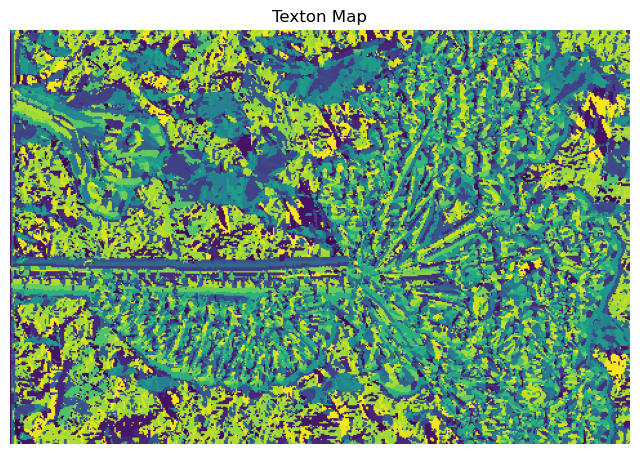

In [49]:
clustered_image = apply_texton_map(image_bank, n_clusters=64)

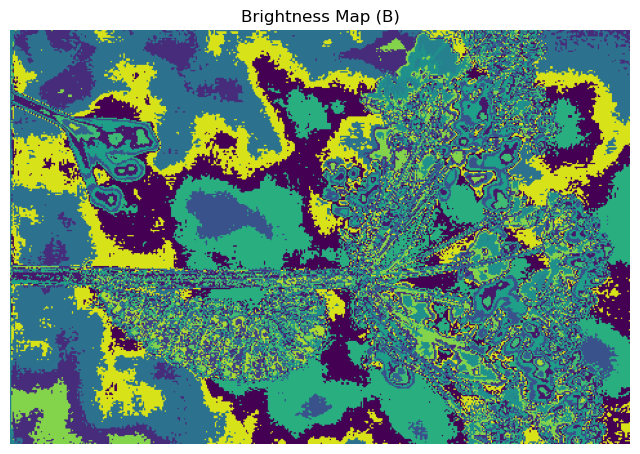

[[ 7  7  7 ...  2  2  2]
 [ 7  7  7 ...  2  2  2]
 [ 7  7  7 ...  2  2  2]
 ...
 [ 7  7  8 ... 15 15 15]
 [ 7  7  8 ...  0  0  0]
 [ 7  7  7 ...  0  0  0]]


In [50]:
new_mage=apply_bright_cluster(image_path,16)
print(new_mage)

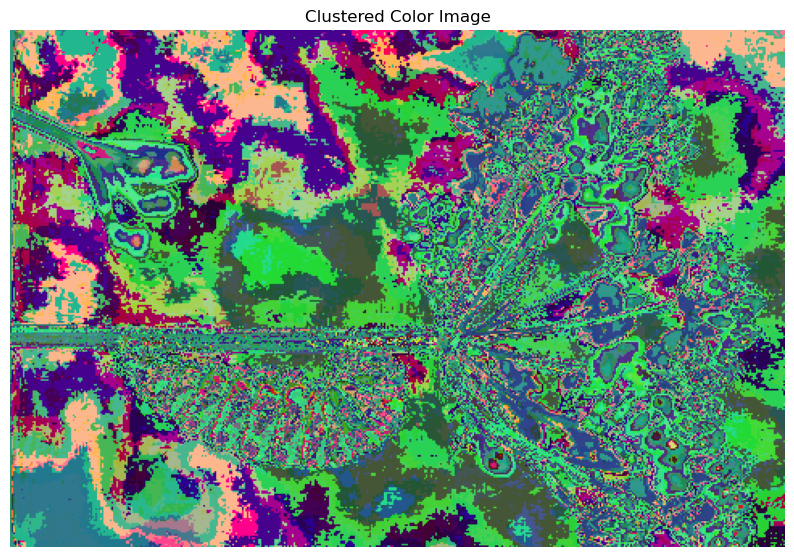

[[[ 34 152 142]
  [ 34 152 142]
  [ 48 152 103]
  ...
  [ 70 183 142]
  [ 70 183 142]
  [253 120 135]]

 [[ 34 152 142]
  [ 48 152 142]
  [ 48 152 103]
  ...
  [253 120 142]
  [253 120 142]
  [253 120 142]]

 [[ 34 152 142]
  [ 48 152 135]
  [ 48 152 103]
  ...
  [253 120 142]
  [253 120 142]
  [253 120 142]]

 ...

 [[ 48 152 142]
  [ 48 152 135]
  [ 34  67 135]
  ...
  [ 41   1  53]
  [ 41   1  53]
  [ 41   1  84]]

 [[ 48 152 142]
  [ 48 152 135]
  [ 48 152 135]
  ...
  [ 41 209  53]
  [ 41   1  53]
  [ 41 209  84]]

 [[ 48 152 142]
  [ 48 152 135]
  [ 48 152 103]
  ...
  [ 41   1  53]
  [ 41   1  53]
  [ 41   1  53]]]


In [51]:
new_mage2=apply_color_cluster(image_path,16)
print(new_mage2)

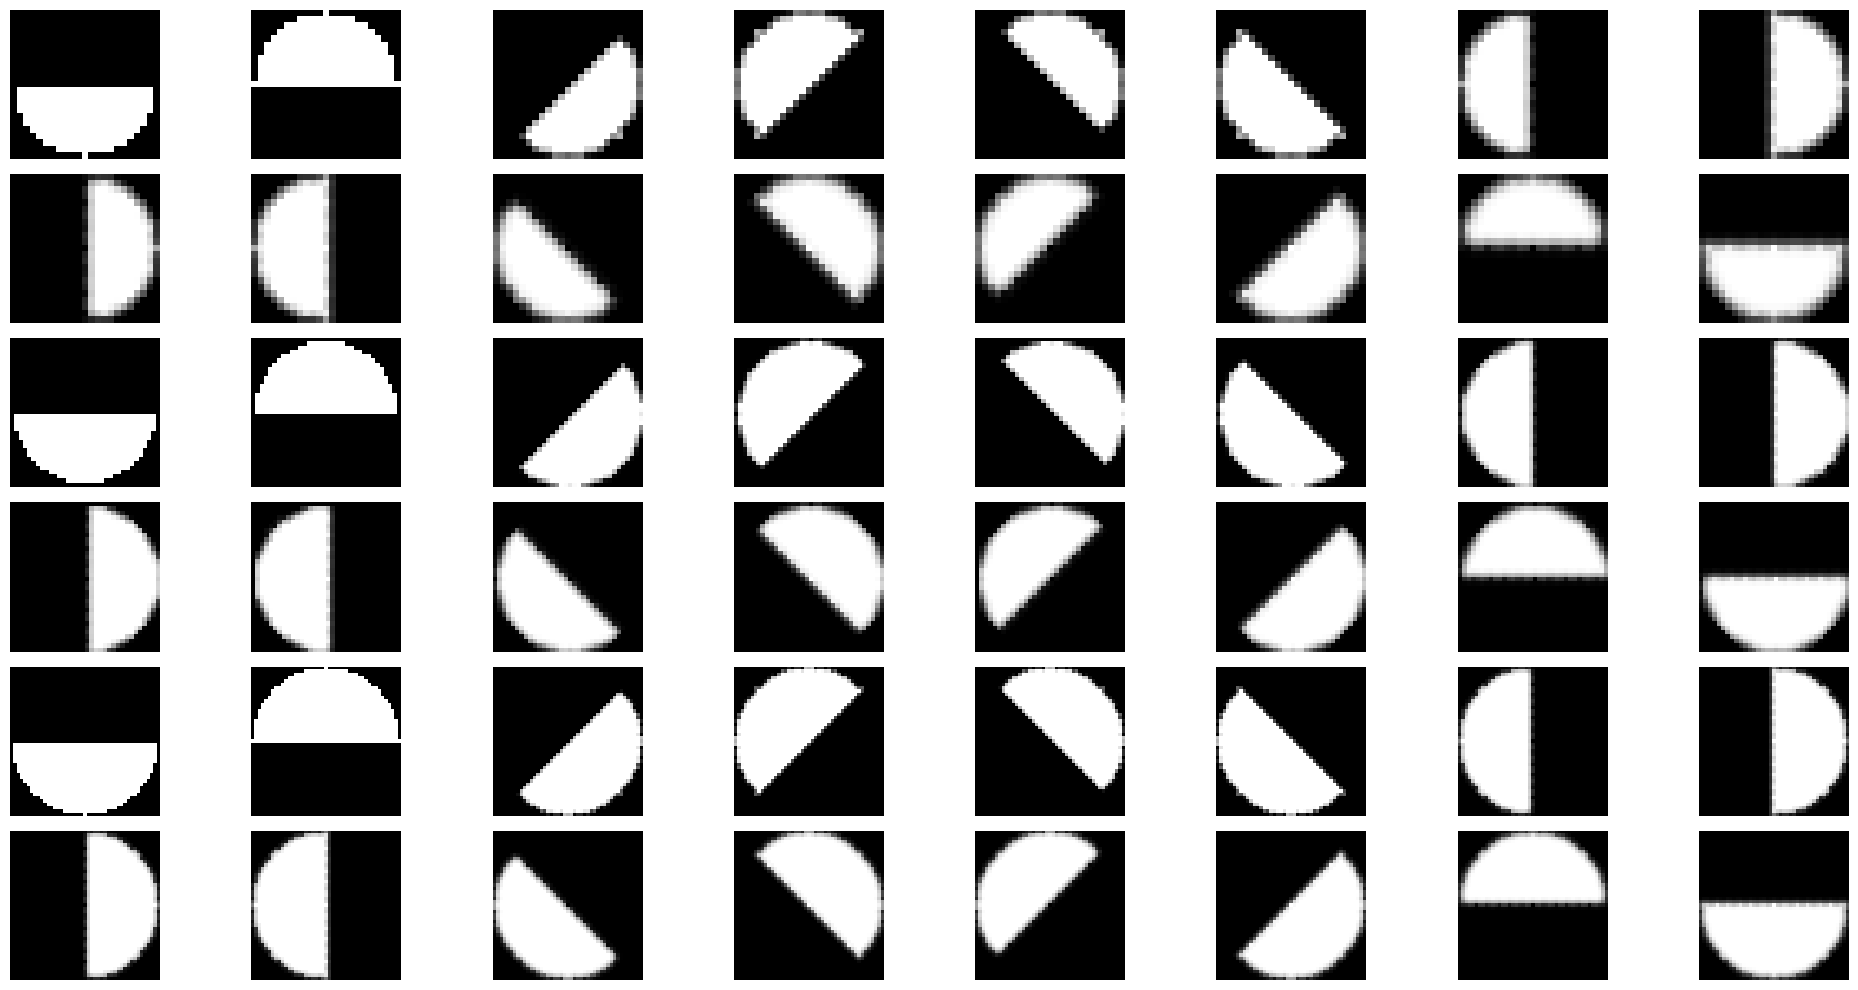

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [52]:
my_disks=generate_mask_disks(11)
print(my_disks[0])

In [53]:
tg=calc_chi(clustered_image,my_disks)

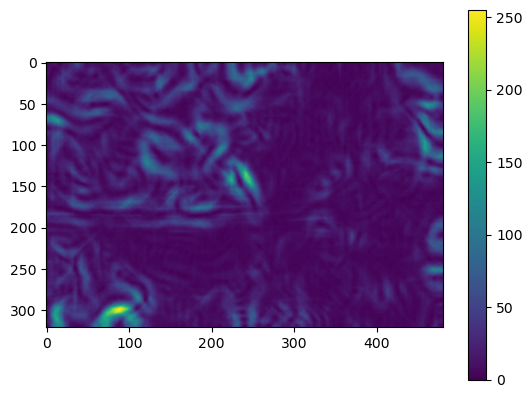

In [54]:
plt.imshow(tg, cmap='viridis')
plt.colorbar()
plt.show()

In [55]:
bg=calc_chi(new_mage,my_disks)
print(bg)

[[0 1 2 ... 0 0 0]
 [0 1 3 ... 0 0 0]
 [2 2 4 ... 1 1 1]
 ...
 [1 2 4 ... 6 4 4]
 [0 1 3 ... 3 1 1]
 [0 1 3 ... 2 0 0]]


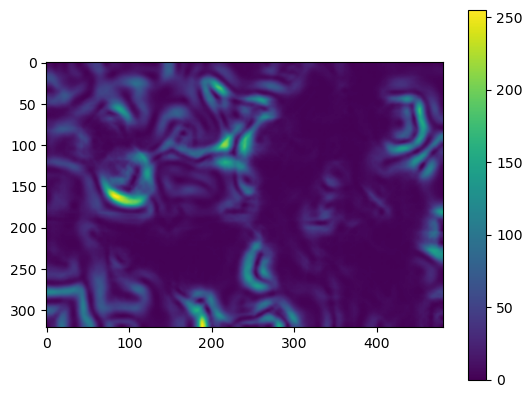

In [56]:
plt.imshow(bg, cmap='viridis')
plt.colorbar()
plt.show()

(321, 481)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 128 ...   0   0   0]
 ...
 [  0  82  36 ...   0   0   0]
 [  0  36  64 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


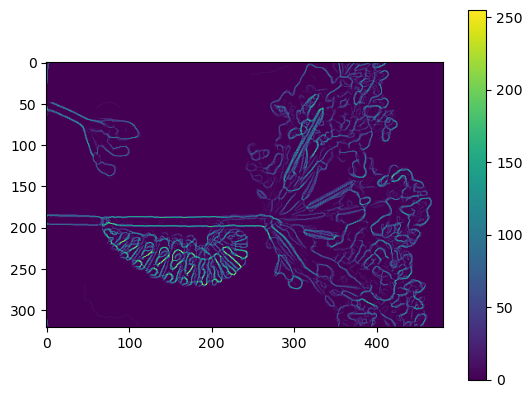

In [64]:
import os
from PIL import Image
image_path = '../BSDS500/CannyBaseline/2.png'
# Load and display the image using PIL
cannypb=cv2.imread(image_path)
cannypb = cv2.cvtColor(cannypb, cv2.COLOR_BGR2GRAY)

print(cannypb.shape)
print(cannypb)
plt.imshow(cannypb, cmap='viridis')
plt.colorbar()
plt.show()

(321, 481, 3)


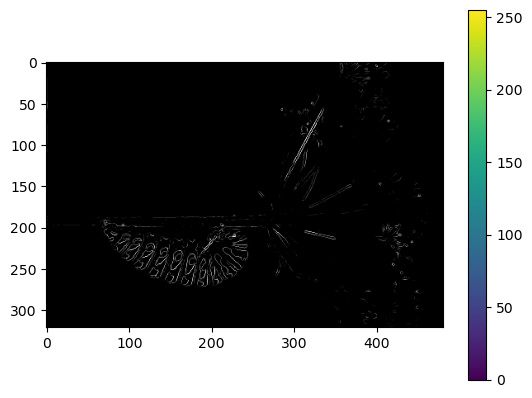

In [58]:
import os
from PIL import Image
image_path2 = '../BSDS500/SobelBaseline/2.png'
# Load and display the image using PIL
sobelpb=cv2.imread(image_path2)
print(sobelpb.shape)
plt.imshow(sobelpb, cmap='viridis')
plt.colorbar()
plt.show()

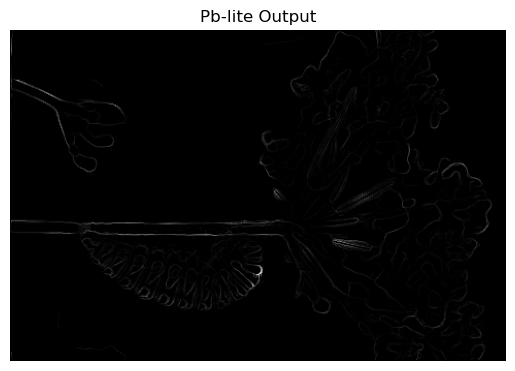

True

In [62]:
w1, w2 = 0.5, 0.5

# Step 1: Compute the mean feature strength (Tg + Bg + Cg) / 3
mean_feature_strength = (tg + bg + cg) / 3
if cannypb.ndim == 3:
    cannypb = cv2.cvtColor(cannypb, cv2.COLOR_BGR2GRAY)
if sobelpb.ndim == 3:
    sobelpb = cv2.cvtColor(sobelpb, cv2.COLOR_BGR2GRAY)
# Step 2: Combine the Canny and Sobel outputs with weights
combined_baseline = w1 * cannypb + w2 * sobelpb

# Step 3: Compute PbEdges using the Hadamard product (element-wise multiplication)
PbEdges = mean_feature_strength * combined_baseline

# Step 4: Normalize the PbEdges for consistency (optional, to bring values to [0, 1])
PbEdges = PbEdges / PbEdges.max()

# Display the result
import matplotlib.pyplot as plt

plt.imshow(PbEdges, cmap='gray')
plt.title("Pb-lite Output")
plt.axis('off')  # Hide axis
plt.show()

# Save the result if needed
import cv2
cv2.imwrite('PbEdges.png', (PbEdges * 255).astype(np.uint8))